In [13]:
import zipfile
import os

# Unzip the dataset
with zipfile.ZipFile("C:\\Users\\91917\\OneDrive\\Desktop\\python_ws\\DataSet.zip", 'r') as zip_ref:
    zip_ref.extractall('C:\\Users\\91917\\OneDrive\\Desktop\\python_ws')



In [14]:
# List files in the Milestone 1 folder
SampleImages_folder = "C:\\Users\\91917\\OneDrive\\Desktop\\python_ws\\DataSet\\SampleImages"
template_folder = "C:\\Users\\91917\\OneDrive\\Desktop\\python_ws\\DataSet\\Template images"

SampleImages_images = [os.path.join(SampleImages_folder, f) for f in os.listdir(SampleImages_folder) if f.endswith('.jpg')]
template_images = [os.path.join(template_folder, f) for f in os.listdir(template_folder) if f.endswith('.jpg')]

print(f'Found {len(SampleImages_images)} images for SampleImages')
print(f'Found {len(template_images)} template images')


Found 3 images for SampleImages
Found 12 template images


In [15]:
import cv2
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image




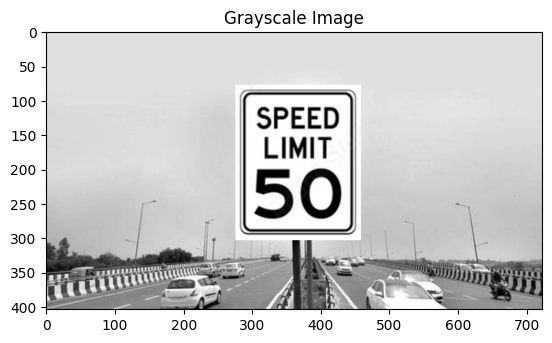

In [16]:
# Preprocess an example image
example_image = SampleImages_images[0]
gray_example = preprocess_image(example_image)

plt.imshow(gray_example, cmap='gray')
plt.title('Grayscale Image')
plt.show()

In [17]:
def match_template(image, template):
    result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
    _, max_val, _, max_loc = cv2.minMaxLoc(result)
    return max_val, max_loc

# Load and preprocess template images
templates = [preprocess_image(t) for t in template_images]

# Match templates to the example image
for template in templates:
    max_val, max_loc = match_template(gray_example, template)
    print(f'Match value: {max_val}, Location: {max_loc}')


Match value: 0.5858529210090637, Location: (278, 81)
Match value: 0.6102709174156189, Location: (279, 81)
Match value: 0.8718844056129456, Location: (278, 82)
Match value: 0.7652827501296997, Location: (275, 80)
Match value: 0.7612020373344421, Location: (276, 78)
Match value: 0.7134535908699036, Location: (277, 81)
Match value: 0.9999344944953918, Location: (276, 78)
Match value: 0.8861767649650574, Location: (276, 79)
Match value: 0.838101863861084, Location: (276, 82)
Match value: 0.7435120940208435, Location: (278, 81)
Match value: 0.941447377204895, Location: (277, 80)
Match value: 0.825855016708374, Location: (277, 80)


In [18]:
def extract_speed_limit(template_path):
    basename = os.path.basename(template_path)
    # Assuming the filename format is 'Template-XX.jpg' where XX is the speed limit
    try:
        speed_limit = int(basename.split('-')[1].split('.')[0])
    except (IndexError, ValueError):
        speed_limit = None  # Handle the case where the format doesn't match
    return speed_limit

# Extract speed limit from an example template
example_template = template_images[0]
speed_limit = extract_speed_limit(example_template)
print(f'Extracted speed limit: {speed_limit} km/h')


Extracted speed limit: 10 km/h


In [19]:
!pip install pandas
import pandas as pd

In [20]:

def detect_speed_limit(image_path, templates):
    image = preprocess_image(image_path)
    best_match = None
    best_val = 0
    for template_path, template in zip(template_images, templates):
        max_val, _ = match_template(image, template)
        if max_val > best_val:
            best_val = max_val
            best_match = template_path
    if best_match:
        speed_limit = extract_speed_limit(best_match)
    else:
        speed_limit = None
    return speed_limit

In [21]:
# Detect speed limits for all images
results = []
templates = [preprocess_image(t) for t in template_images]
for image_path in SampleImages_images:
    speed_limit = detect_speed_limit(image_path, templates)
    results.append((os.path.basename(image_path), speed_limit))



In [22]:
# Save to CSV
df = pd.DataFrame(results, columns=['Input image name', 'Speed limit'])
output_csv_path = 'C:\\Users\\91917\\OneDrive\\Desktop\\python_ws\\Output.csv'
df.to_csv(output_csv_path, index=False)
print(f'Results saved to {output_csv_path}')

Results saved to C:\Users\91917\OneDrive\Desktop\python_ws\Output.csv
